In [1]:
### imports here !!!

import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand 
from sympy import Matrix, init_printing
pi = np.pi    #### for easier coding
exp = np.exp

#  Instructions:
### Enter parameters , dim is indirectly determined , K = 3

In [26]:
################################## 
## Code for data generation
#################################

#### mini function to choose which 'k'
def generate_K(p1,p2,n):   #### Genrates X , K = no.of mixtures, p1=pi_1, p2 = pi_2 ,p3 = 1 - pi_1 -pi_2
    
    U = rand.uniform(0,1,size = n)
    K = np.zeros((U.shape),dtype = np.uint8)
    Color= np.zeros((U.shape),dtype = str) #### colors for plotting data , only for 2D

    
    for i in range(len(U)):

        u = U[i]
        if(u<=p1):
            K[i] = 0
            Color[i] = 'r'
        elif (u<= p1+ p2 and u> p1):
            K[i] = 1
            Color[i] = 'b'
        else :
            K[i] = 2
            Color[i] = 'g'
    return K,Color


## Generates the whole mixture of points after generating 'k
def generate_points_in_mixture(K,M,C):## Generated clusters , M mean matrix , C cov matrix
    n = len(K)
    
    data = np.zeros((n,dim))
    
    for i in range(n):
        
        mean = M[K[i]]
        cov  = C[K[i]]
        data[i] = np.random.multivariate_normal(mean, cov, 1)
        
    return data


####### displays the parameters.
def display_param(theta_actual,title):
    theta = theta_actual.copy()
    
    K,_ = np.shape(theta)
    
   #print(np.shape(theta[0][1])) 
    
    
    print('##########################################################')
    print('################# %s ##################'%title)
    print('##########################################################\n')
    for i in range(K):
        print('******************* K = %d *******************'%(i+1) )
        print('\u03C0%d = %.2f' %(i+1,theta[i][0]) )
        print ('\u03BC%d = '%(i+1), end = '')
        mean = np.reshape(theta[i][1],(1,dim))
        display( Matrix (mean) )
        print ('\u03A3%d = '%(i+1), end = '')
        display( Matrix (theta[i][2]) )
    

### Here Ive generated data , and displayed it.
### K is indirectly defined by your inputs of pi_1,pi_2,pi_3 --> K=3

## Data generation and displaying actual param


##########################################################
################# Ground truth param ##################
##########################################################

******************* K = 1 *******************
π1 = 0.10
μ1 = 

Matrix([[-5, 0]])

Σ1 = 

Matrix([
[1.0, 0.7],
[0.7, 1.0]])

******************* K = 2 *******************
π2 = 0.30
μ2 = 

Matrix([[0, 5]])

Σ2 = 

Matrix([
[1.0, 0.0],
[0.0, 0.4]])

******************* K = 3 *******************
π3 = 0.60
μ3 = 

Matrix([[5, 0]])

Σ3 = 

Matrix([
[1.0, 0.0],
[0.0, 1.0]])

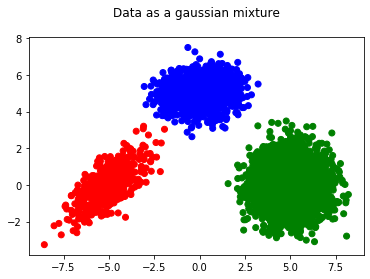

In [31]:
#####################################
######  Generating Data with the following parameters...
### input should be K, and parameters to generate data .
#####################################

######## Displaying actual parameters : 

K = 3


#Input actual parameters to generate data : 

'''
# For 1D:
pi_1 = 0.1
mu_1 = np.array([-5])
C_1 = np.array([1])

pi_2 = 0.2
mu_2 = np.array([5])
C_2 = np.array([1])

pi_3 = 0.7
mu_3 = np.array([0])
C_3 = np.array([1])

'''


#For 2D :

pi_1 = 0.1
mu_1 = np.array([-5,0])
dim = mu_1.size
C_1  = np.array([[1,0.7],[0.7,1]])

pi_2 = 0.3
mu_2 = np.array([0,5])
C_2  = np.array([[1,0],[0,0.4]])

pi_3 = 0.6
mu_3 = np.array([5,0])
C_3  = np.identity(dim)





## For 3D : 
'''
pi_1 = 0.1
mu_1 = np.array([-5,0,0])
dim = mu_1.size
C_1 = np.identity(dim)

pi_2 = 0.2
mu_2 = np.array([0,5,0])
C_2 = np.identity(dim)

pi_3 = 0.7
mu_3 = np.array([0,0,5])
C_3 = np.identity(dim)
'''



####################################################################################

dim = mu_1.size

theta_1 = np.array([pi_1,mu_1,C_1])
theta_2 = np.array([pi_2,mu_2,C_2])
theta_3 = np.array([pi_3,mu_3,C_3])

theta_actual = np.array([theta_1,theta_2,theta_3])

display_param(theta_actual,'Ground truth param') ### displays parameter

######## Creating Data
k,color = generate_K(pi_1,pi_2,5000)
M = np.array( [mu_1,mu_2,mu_3] )

C = np.zeros((K,dim,dim))
C[0] = C_1
C[1] = C_2
C[2] = C_3

Data = generate_points_in_mixture(k,M,C) 

###### Plotting Data :  IMP :Valid for 2 dimensional case..
if (dim == 2):
    plt.scatter(Data[:,0],Data[:,1],c = color)
    plt.title('Data as a gaussian mixture\n ')
    plt.show()


### Initialising parameters

In [32]:
#theta_init = [theta_1,theta_2,theta_3]

############ initialising parameters.. as theta_init

## For 1 Dim
'''
pi_1 = 0.1
mu_1 = np.array([-5])
C_1 = np.array([[1]])

pi_2 = 0.2
mu_2 = np.array([5])
C_2 = np.array([[1]])

pi_3 = 0.7
mu_3 = np.array([0])
C_3 = np.array([[1]])
'''

#For 2D 


pi_1 = 0.33
mu_1 = np.array([-5,-1])
C_1  = np.identity(dim)

pi_2 = 0.33
mu_2 = np.array([1,5])
C_2  = np.identity(dim)

pi_3 = 0.33
mu_3 = np.array([4,0])
C_3  = np.identity(dim)




## For 3D : 
'''
pi_1 = 0.33
mu_1 = np.array([-7,0,1])
dim = mu_1.size
C_1 = np.identity(dim)

pi_2 = 0.33
mu_2 = np.array([1,4,0])
C_2 = np.identity(dim)

pi_3 = 0.33
mu_3 = np.array([-2,0.5,6])
C_3 = np.identity(dim)
'''



theta_1 = np.array([pi_1,mu_1,C_1])
theta_2 = np.array([pi_2,mu_2,C_2])
theta_3 = np.array([pi_3,mu_3,C_3])

theta_init = np.array([theta_1,theta_2,theta_3])

display_param(theta_init,'Initialised parameter') ### displays parameter


##########################################################
################# Initialised parameter ##################
##########################################################

******************* K = 1 *******************
π1 = 0.33
μ1 = 

Matrix([[-5, -1]])

Σ1 = 

Matrix([
[1.0, 0.0],
[0.0, 1.0]])

******************* K = 2 *******************
π2 = 0.33
μ2 = 

Matrix([[1, 5]])

Σ2 = 

Matrix([
[1.0, 0.0],
[0.0, 1.0]])

******************* K = 3 *******************
π3 = 0.33
μ3 = 

Matrix([[4, 0]])

Σ3 = 

Matrix([
[1.0, 0.0],
[0.0, 1.0]])

###  Code for Expectation Maximisation

In [19]:
def find_lkhood(x,Theta_k):
    theta_k = Theta_k.copy()
    pi_k,mu_k,C_k = theta_k
    d = x.size
    #print(C_k)
        
    f_x = pi_k * ( (1/(2*pi))**(d/2) ) * (np.linalg.det(C_k)**-0.5) * exp(-0.5*( (x-mu_k)@np.linalg.inv(C_k)@np.transpose(x-mu_k) ))
    #f_x = pi_k* ((1/(2*pi))**(d/2)) * (np.linalg.det(C_k)**-0.5)
    return f_x

def find_Gamma(X,Theta):  #### finding gamma vector
    theta = Theta.copy()
    N,d = X.shape
    K,_ = np.shape(theta)
    
    L = np.zeros((N,K))
    Sum = np.zeros((N))
    for n in range(N):
        
        for k in range(K):
            
            L[n][k] = find_lkhood(X[n],theta[k])

            Sum[n] = Sum[n] + L[n][k]
        L[n,:] = L[n,:]/Sum[n]
    
    return L,Sum
    

def find_Logloss(Sum):   ######  finding log loss
    log_sum = np.log(Sum)
    return np.sum(log_sum)


def find_NK(Gamma_actual):
    Gamma = Gamma_actual.copy()
    N,K = Gamma.shape
    NK = np.zeros(K)
    
    for i in range(K):
        NK[i] = np.sum(Gamma[:,i])
    return NK
    
def vectorize_mean(mu_vec,X):
    v = np.ones((X.shape))
    return mu_vec*v

def vector_dot_product(g,x):
    n,d = x.shape
    x_cap = x.copy()
    for i in range(d):
        x_cap[:,i] = x_cap[:,i]*g
    return(x_cap) 

    
def find_param(X,Gamma_actual,NK_actual):  ########## Finding parameters from gamma matrix
    Gamma = Gamma_actual.copy()
    NK = NK_actual.copy()
    N,K = Gamma.shape
    theta = []
    for k in range(K):
        pi_k = NK[k]/N
        mu_k = (np.transpose(X)@(Gamma[:,k]) )/ (NK[k])
        
        mu_vec = vectorize_mean(mu_k,X)
        
        C_k = np.transpose(X-mu_vec)@vector_dot_product(Gamma[:,k],(X-mu_vec) )
        C_k = C_k/NK[k]
        
        theta_k = np.array([pi_k,mu_k,C_k])
        theta.append(theta_k)
        
        
    return theta


def print_parameter(theta,loss,i):     ########### Displaying parameters
    K,_ = np.shape(theta)
    dim = theta[0][1].size
    print('##########################################################')
    print('#################### Iteration : %d #######################'%i)
    print('################# Log Loss : %.2f ###################'%loss)
    print('##########################################################\n')
    for i in range(K):
        print('******************* K = %d *******************'%(i+1) )
        print('\u03C0%d = %.2f' %(i+1,theta[i][0]) )
        print ('\u03BC%d = '%(i+1), end = '')
        mean = np.reshape(theta[i][1],(1,dim))
        display( Matrix (mean) )
        print ('\u03A3%d = '%(i+1), end = '')
        display( Matrix (theta[i][2]) )

### Bringing everything together.. 

In [33]:
########### iterations : 

def EM(Data,theta_init,eps):
    Theta = theta_init.copy()
    diff = 1e4
    t=0
    loss_k0 = 1e5
    while (abs(diff) > eps):
        t = t+1
        L,Sum = find_Gamma(Data,Theta)
        loss_k1 = find_Logloss(Sum)
        NK = find_NK(L)
        Theta = find_param(Data,L,NK)
        print_parameter(Theta,loss_k1,t)
        
        diff = loss_k1 - loss_k0
        loss_k0 = loss_k1
    return Theta
        
#################################
#####   IMPLEMENTATION
#################################
Theta_final = EM(Data,theta_init,eps = 1)

##########################################################
#################### Iteration : 1 #######################
################# Log Loss : -21910.27 ###################
##########################################################

******************* K = 1 *******************
π1 = 0.10
μ1 = 

Matrix([[-5.04598364996428, -0.0210628081003382]])

Σ1 = 

Matrix([
[ 1.04069702089649, 0.698032172010868],
[0.698032172010868, 0.956483046880678]])

******************* K = 2 *******************
π2 = 0.29
μ2 = 

Matrix([[-0.0135822242079122, 4.99584262140065]])

Σ2 = 

Matrix([
[  1.07012203789926, 0.0368656474633918],
[0.0368656474633918,  0.414312009039734]])

******************* K = 3 *******************
π3 = 0.60
μ3 = 

Matrix([[5.00037430084637, 0.0237024388029925]])

Σ3 = 

Matrix([
[  1.00604708126622, 0.0297948808471233],
[0.0297948808471233,   1.02818908721645]])

##########################################################
#################### Iteration : 2 #######################
################# Log Loss : -17928.49 ###################
##########################################################

******************* K = 1 *******************
π1 = 0.10
μ1 = 

Matrix([[-5.0328380328714, -0.00688318861591034]])

Σ1 = 

Matrix([
[ 1.06983747837819, 0.729823165695302],
[0.729823165695302, 0.991085689655971]])

******************* K = 2 *******************
π2 = 0.29
μ2 = 

Matrix([[-0.0141633467745915, 5.00242777583625]])

Σ2 = 

Matrix([
[  1.04222509915745, 0.0360296915331297],
[0.0360296915331297,  0.401200387578518]])

******************* K = 3 *******************
π3 = 0.61
μ3 = 

Matrix([[4.99955433755989, 0.0257663491207064]])

Σ3 = 

Matrix([
[  1.00662538255463, 0.0272421902689792],
[0.0272421902689792,   1.03412414260289]])

##########################################################
#################### Iteration : 3 #######################
################# Log Loss : -17927.43 ###################
##########################################################

******************* K = 1 *******************
π1 = 0.10
μ1 = 

Matrix([[-5.03153103999078, -0.00534640453715871]])

Σ1 = 

Matrix([
[1.07305979552496,   0.7335627974039],
[ 0.7335627974039, 0.995461466973777]])

******************* K = 2 *******************
π2 = 0.29
μ2 = 

Matrix([[-0.0138046744296454, 5.00277327254301]])

Σ2 = 

Matrix([
[ 1.04123630822603, 0.035361248689787],
[0.035361248689787, 0.400617439416538]])

******************* K = 3 *******************
π3 = 0.61
μ3 = 

Matrix([[4.99954168484872, 0.0257882950492667]])

Σ3 = 

Matrix([
[ 1.00664449455842, 0.027201221240266],
[0.027201221240266,  1.03418814813151]])

##########################################################
#################### Iteration : 4 #######################
################# Log Loss : -17927.42 ###################
##########################################################

******************* K = 1 *******************
π1 = 0.10
μ1 = 

Matrix([[-5.03140264779007, -0.00519835220559832]])

Σ1 = 

Matrix([
[ 1.07338758465212, 0.733936011507042],
[0.733936011507042, 0.995889410425692]])

******************* K = 2 *******************
π2 = 0.29
μ2 = 

Matrix([[-0.0137678097447979, 5.00280342483574]])

Σ2 = 

Matrix([
[  1.04116015048325, 0.0352941047375675],
[0.0352941047375675,  0.400567034687359]])

******************* K = 3 *******************
π3 = 0.61
μ3 = 

Matrix([[4.99954160328872, 0.025788410297282]])

Σ3 = 

Matrix([
[  1.00664467281819, 0.0272009600464283],
[0.0272009600464283,   1.03418848225486]])

### Summarising results

In [34]:
display_param(theta_actual,'Ground truth param')
display_param(Theta_final,'Converged param')


##########################################################
################# Ground truth param ##################
##########################################################

******************* K = 1 *******************
π1 = 0.10
μ1 = 

Matrix([[-5, 0]])

Σ1 = 

Matrix([
[1.0, 0.7],
[0.7, 1.0]])

******************* K = 2 *******************
π2 = 0.30
μ2 = 

Matrix([[0, 5]])

Σ2 = 

Matrix([
[1.0, 0.0],
[0.0, 0.4]])

******************* K = 3 *******************
π3 = 0.60
μ3 = 

Matrix([[5, 0]])

Σ3 = 

Matrix([
[1.0, 0.0],
[0.0, 1.0]])

##########################################################
################# Converged param ##################
##########################################################

******************* K = 1 *******************
π1 = 0.10
μ1 = 

Matrix([[-5.03140264779007, -0.00519835220559832]])

Σ1 = 

Matrix([
[ 1.07338758465212, 0.733936011507042],
[0.733936011507042, 0.995889410425692]])

******************* K = 2 *******************
π2 = 0.29
μ2 = 

Matrix([[-0.0137678097447979, 5.00280342483574]])

Σ2 = 

Matrix([
[  1.04116015048325, 0.0352941047375675],
[0.0352941047375675,  0.400567034687359]])

******************* K = 3 *******************
π3 = 0.61
μ3 = 

Matrix([[4.99954160328872, 0.025788410297282]])

Σ3 = 

Matrix([
[  1.00664467281819, 0.0272009600464283],
[0.0272009600464283,   1.03418848225486]])